In [1]:
pip install numpy matplotlib scikit-learn

Features shape: (1797, 64), Labels shape: (1797,)


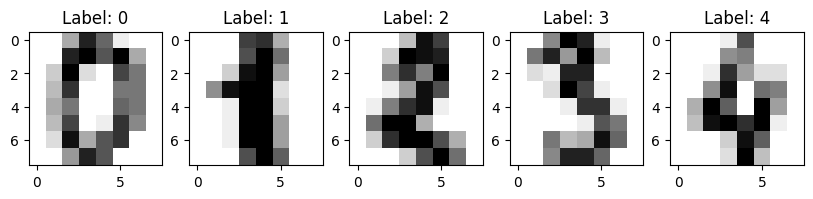

Accuracy for K=3: 0.9694
Accuracy for K=5: 0.9750
Accuracy for K=7: 0.9722
Accuracy for K=9: 0.9722


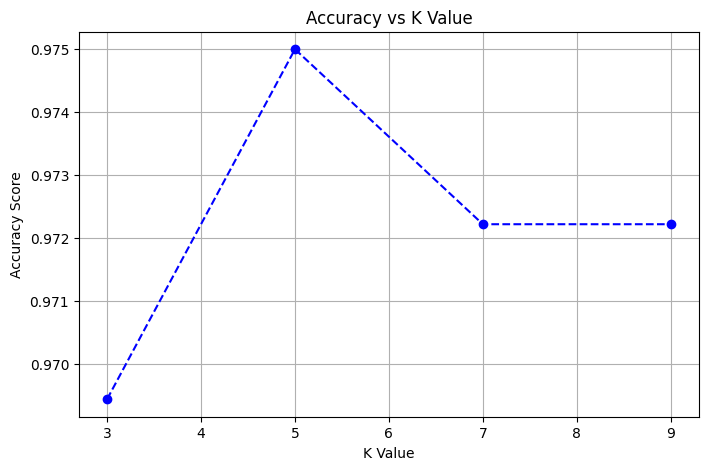

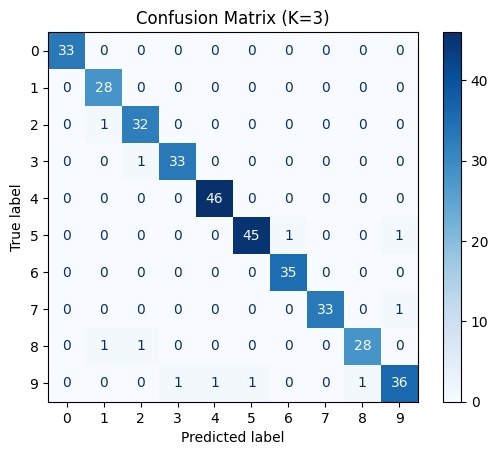

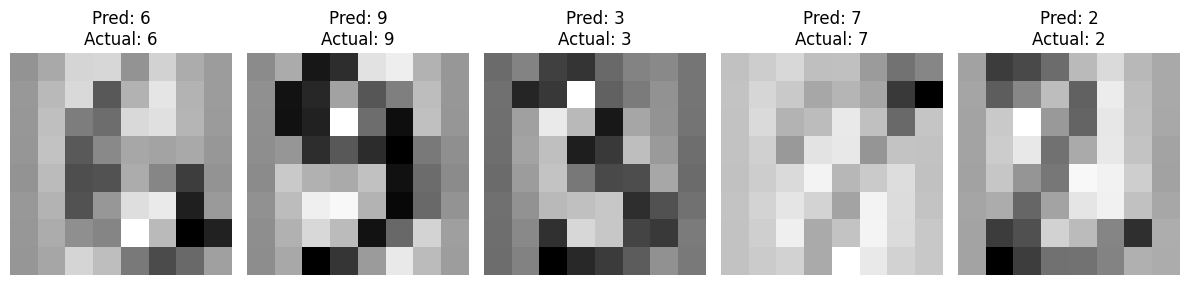

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 1. Load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")

# 2. Visualize few digit images
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

# 3. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5, 6 & 7. Try multiple K values and plot accuracy
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for K={k}: {acc:.4f}")

# Plotting Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

# 8. Generate confusion matrix
best_k = 3 # As per task starting hint
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

# 9. Display 5 test images with predicted labels
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Reshape back to 8x8 for visualization
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Pred: {y_final_pred[i]}\nActual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()